In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics.regression import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score, explained_variance_score

In [239]:
data = pd.read_csv('/Users/ilchenkoslava/PycharmProjects/Upwork/MLSN/mlsn_property_data.csv')

In [240]:
data.head().T

,0,1,2,3,4
адрес,ул. 3-я Любинская 28а,ул. Ватутина 8,ул. Перелета 19,ул. Крупской 13/1,ул. Крупской 13/3
этаж,3/5,2/16,3/12,1/19,1/19
площадь общая,23.4 м²,38.5 м²,42.5 м²,40.5 м²,39.4 м²
площадь жилая,11.2 м²,16.6 м²,14.4 м²,не указано,не указано
площадь кухни,6.2 м²,8.7 м²,13.3 м²,не указано,не указано
планировка,не указано,свободная планировка,свободная планировка,свободная планировка,свободная планировка
санузел,совмещенный,совмещенный,совмещенный,совмещенный,совмещенный
балкон,нет,лоджия,балкон и лоджия,лоджия,лоджия
состояние/ремонт,черновая отделка,черновая отделка,черновая отделка,чистовая отделка,чистовая отделка
покрытие пола,без покрытия,не указано,без покрытия,без покрытия,без покрытия


### Редактирование исходных данных

In [241]:
data.columns

Index(['адрес', ' этаж', ' площадь общая', ' площадь жилая', ' площадь кухни',
       ' планировка', ' санузел', ' балкон', ' состояние/ремонт',
       ' покрытие пола', ' материал окон', ' входная дверь', ' вид из окон',
       ' угловая', ' домофон', ' счетчики воды', ' тип дома', ' материал дома',
       ' новостройка', ' срок сдачи', ' высота потолка', ' интернет', ' лифт',
       ' мусоропровод', ' парковка', ' рейтинг', ' экология',
       ' инфраструктура', ' безопасность', ' социальное восприятие',
       ' уровень комфорта', ' транспортная доступность', ' цена'],
      dtype='object')

In [242]:
data.columns = data.apply(lambda x: x.name.strip())

In [243]:
data.shape

(1019, 33)

In [244]:
data.insert(2, 'этажность', '-')
data['этажность'] = data['этаж'].apply(lambda x: x.split('/')[-1])
data['этаж'] = data['этаж'].apply(lambda x: x.split('/')[0])

In [245]:
data['цена'] = data['цена'].apply(lambda x: x.replace(' ₽', '').replace(' ', ''))
data.drop(list(data[data['адрес'] == 'адрес'].index), axis=0, inplace=True)

In [246]:
data['площадь общая'] = data['площадь общая'].apply(lambda x: x.replace('\xa0м²', ''))
data['площадь жилая'] = data['площадь жилая'].apply(lambda x: x.replace('\xa0м²', ''))
data['площадь кухни'] = data['площадь кухни'].apply(lambda x: x.replace('\xa0м²', ''))

In [247]:
for f in data.columns:
    data[f] = data[f].str.strip()
    
for f in data.columns[list(data.columns).index('рейтинг'):list(data.columns).index('цена')]:
    data.drop(list(data[data[f] == '-'].index), axis=0, inplace=True)
    data.drop(list(data[data[f] == '0.0'].index), axis=0, inplace=True)

In [248]:
data.head().T

,1,2,5,6,7
адрес,ул. Ватутина 8,ул. Перелета 19,ул. Красной Звезды 1-я 79,ул. Багратиона 31,ул. Багратиона 31
этаж,2,3,4,2,9
этажность,16,12,9,17,17
площадь общая,38.5,42.5,37.3,31,31
площадь жилая,16.6,14.4,не указано,не указано,не указано
площадь кухни,8.7,13.3,5,не указано,не указано
планировка,свободная планировка,свободная планировка,не указано,не указано,студия
санузел,совмещенный,совмещенный,не указано,совмещенный,совмещенный
балкон,лоджия,балкон и лоджия,балкон,лоджия,лоджия
состояние/ремонт,черновая отделка,черновая отделка,черновая отделка,чистовая отделка,евроремонт


In [249]:
for d in list(data.columns[6:-8]):
    print(data[d].value_counts())
    print("\n")

не указано                351
изолированные комнаты     256
свободная планировка       65
студия                     50
смежно-изолир. комнаты     27
смежные комнаты            16
Name: планировка, dtype: int64


совмещенный    508
раздельный     133
не указано     100
2 с/у           22
нет с/у          2
Name: санузел, dtype: int64


нет                   266
балкон                260
лоджия                200
2 лоджии               15
балкон и лоджия        10
2 балкона              10
2 лоджии и балкон       3
2 балкона и лоджия      1
Name: балкон, dtype: int64


хорошее состояние               219
черновая отделка                148
отличное состояние              118
чистовая отделка                 66
удовлетворительное состояние     56
косметический ремонт             49
евроремонт                       30
требует ремонта                  29
не указано                       21
ремонт от застройщика            20
дизайнерский ремонт               9
Name: состояние/ремонт, dtype

Исходя из полученных данных, ниже были выбраны следующие категориальные признаки. 
Выбраны они были в зависимости от количества пропусков (т.е. значение признака = 'не указано'). 

In [250]:
columns = ['балкон', 'санузел', 'состояние/ремонт', 'материал дома', 'новостройка']

In [251]:
new_data = data

In [252]:
for col in columns:
    new_data.drop(list(new_data['не указано' == new_data[col]].index), inplace=True)

In [253]:
new_data.shape

(659, 34)

In [254]:
features = ['этаж', 'этажность', 'площадь общая', 'площадь жилая', 'площадь кухни',
            'балкон', 'санузел', 'состояние/ремонт', 'материал дома', 'новостройка', 
           'рейтинг', 'экология', 'инфраструктура', 'безопасность', 'социальное восприятие',
           'уровень комфорта', 'транспортная доступность', 'цена']

In [255]:
new_data = new_data[features]

In [256]:
new_data = new_data.apply(pd.to_numeric, errors='ignore')

Также выкинем из датасета следующие площади, так как в них много пропусков.

In [257]:
new_data.drop(['площадь жилая', 'площадь кухни'], axis=1, inplace=True)

In [258]:
new_data.dtypes

этаж                          int64
этажность                     int64
площадь общая               float64
балкон                       object
санузел                      object
состояние/ремонт             object
материал дома                object
новостройка                  object
рейтинг                     float64
экология                    float64
инфраструктура              float64
безопасность                float64
социальное восприятие       float64
уровень комфорта            float64
транспортная доступность    float64
цена                          int64
dtype: object

Теперь закодируем категориальные признаки.

In [259]:
label_encoder = LabelEncoder()

for label in columns:
    new_data[label] = label_encoder.fit_transform(new_data[label])

В итоге обработанный датасет выглядит следующим образом:

In [260]:
new_data.head()

,этаж,этажность,площадь общая,балкон,санузел,состояние/ремонт,материал дома,новостройка,рейтинг,экология,инфраструктура,безопасность,социальное восприятие,уровень комфорта,транспортная доступность,цена
1,2,16,38.5,6,3,8,2,0,3.6,2.9,3.5,3.6,3.5,3.7,2.0,1500000
2,3,12,42.5,5,3,8,2,0,3.3,2.9,2.7,3.5,3.3,3.6,1.0,1574000
6,2,17,31.0,6,3,9,1,1,3.0,2.7,3.2,2.3,2.5,3.4,2.0,1395000
7,9,17,31.0,6,3,1,1,1,3.0,2.7,3.2,2.3,2.5,3.4,2.0,1577000
8,16,17,28.1,6,3,1,1,1,3.0,2.7,3.2,2.3,2.5,3.4,2.0,1642000


In [261]:
new_data.describe()

,этаж,этажность,площадь общая,балкон,санузел,состояние/ремонт,материал дома,новостройка,рейтинг,экология,инфраструктура,безопасность,социальное восприятие,уровень комфорта,транспортная доступность,цена
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,6.590000e+02
mean,5.074355,8.959029,42.441275,5.468892,2.693475,5.795144,2.274659,0.731411,2.889833,2.630956,2.816540,2.861608,2.814416,3.029439,1.720789,1.825033e+06
std,3.310056,3.977118,22.178016,1.538815,0.647748,2.451767,1.372376,0.443562,0.735758,0.271460,0.619307,0.754620,0.880654,0.971375,1.027025,1.536059e+06
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.700000,1.600000,1.600000,1.300000,0.400000,1.000000,3.470000e+05
25%,3.000000,5.000000,30.000000,4.000000,3.000000,3.000000,1.000000,0.000000,2.600000,2.500000,2.400000,2.300000,2.200000,2.650000,1.000000,1.240000e+06
50%,4.000000,9.000000,36.300000,6.000000,3.000000,7.000000,2.000000,1.000000,3.000000,2.600000,3.000000,2.800000,2.700000,3.300000,1.000000,1.438000e+06
75%,7.000000,12.000000,44.650000,7.000000,3.000000,8.000000,4.000000,1.000000,3.300000,2.900000,3.300000,3.500000,3.500000,3.600000,2.000000,1.641000e+06
max,16.000000,19.000000,206.000000,7.000000,3.000000,9.000000,5.000000,1.000000,4.000000,3.400000,4.400000,4.700000,4.700000,4.500000,5.000000,1.751000e+07


In [262]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 1 to 1018
Data columns (total 16 columns):
этаж                        659 non-null int64
этажность                   659 non-null int64
площадь общая               659 non-null float64
балкон                      659 non-null int64
санузел                     659 non-null int64
состояние/ремонт            659 non-null int64
материал дома               659 non-null int64
новостройка                 659 non-null int64
рейтинг                     659 non-null float64
экология                    659 non-null float64
инфраструктура              659 non-null float64
безопасность                659 non-null float64
социальное восприятие       659 non-null float64
уровень комфорта            659 non-null float64
транспортная доступность    659 non-null float64
цена                        659 non-null int64
dtypes: float64(8), int64(8)
memory usage: 87.5 KB


In [263]:
new_data.drop(list(new_data[new_data['этаж'] == 0].index), inplace=True)
new_data.drop(list(new_data[new_data['этажность'] == 0].index), inplace=True)

### Обучение данных

#### Linear regression

In [264]:
y = new_data['цена']
X = new_data.drop('цена', axis=1)

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
X_train.shape, X_holdout.shape, y_train.shape, y_holdout.shape

((460, 15), (198, 15), (460,), (198,))

In [265]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [266]:
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, linreg.predict(X_holdout)))
print("Score: %.3f" % explained_variance_score(y_holdout, linreg.predict(X_holdout)))

Mean squared error (test): 279306432977.336
Score: 0.825


In [267]:
linreg_coef = pd.DataFrame(linreg.coef_, new_data.drop('цена', axis=1).columns, columns=['coef'])
linreg_coef.sort_values(by=['coef'], ascending=False)

,coef
новостройка,779313.549199
социальное восприятие,325747.738297
безопасность,304408.274398
санузел,138554.881744
площадь общая,64170.933976
этажность,43381.398834
балкон,36771.895030
этаж,-5237.992934
уровень комфорта,-5916.201071
транспортная доступность,-55387.776682


Самым влиятельным признаком в модели линейной регрессии оказался признак <b>"новостройка"</b>

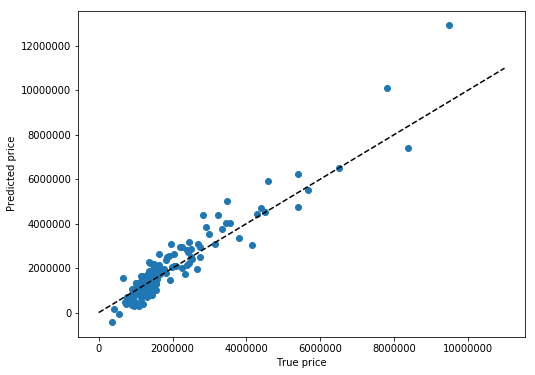

In [268]:
plt.figure(figsize=(8, 6))
plt.scatter(y_holdout, linreg.predict(X_holdout))
plt.plot([0, 11000000], [0, 11000000], '--k')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()

#### Gradient boosting regressor

Text(0, 0.5, 'Predicted price')

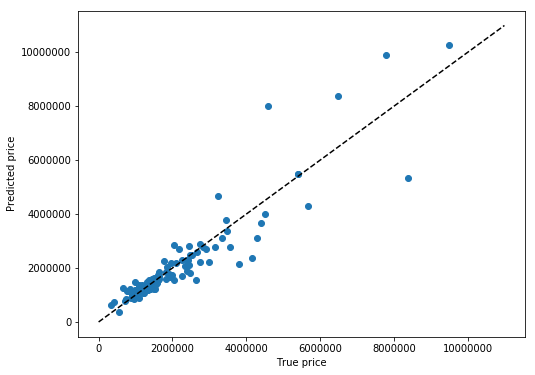

In [269]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(random_state=17)
clf.fit(X_train, y_train)

predicted = clf.predict(X_holdout)
expected = y_holdout

plt.figure(figsize=(8, 6))
plt.scatter(expected, predicted)
plt.plot([0, 11000000], [0, 11000000], '--k')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('True price')
plt.ylabel('Predicted price')

In [270]:
print("Mean squared error: %.3f" % mean_squared_error(expected, predicted))
print("Score: %.3f" % explained_variance_score(expected, predicted))

Mean squared error: 254648209755.031
Score: 0.840


<b> Test size = 0.1 </b>

(592, 15) (66, 15) (592,) (66,)


Text(0, 0.5, 'Predicted price')

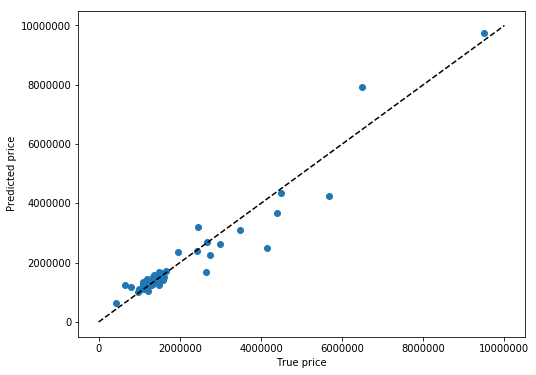

In [271]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, random_state=17)
print(X_train.shape, X_holdout.shape, y_train.shape, y_holdout.shape)

clf = GradientBoostingRegressor(random_state=17)
clf.fit(X_train, y_train)

predicted = clf.predict(X_holdout)
expected = y_holdout

plt.figure(figsize=(8, 6))
plt.scatter(expected, predicted)
plt.plot([0, 10000000], [0, 10000000], '--k')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('True price')
plt.ylabel('Predicted price')

In [272]:
print("Mean squared error (test): %.3f" % mean_squared_error(expected, predicted))
print("Score: %.3f" % explained_variance_score(expected, predicted))

Mean squared error (test): 160917307854.790
Score: 0.923


In [273]:
clf_coef = pd.DataFrame(clf.feature_importances_, new_data.drop('цена', axis=1).columns, columns=['coef'])
clf_coef.sort_values(by=['coef'], ascending=False)

,coef
площадь общая,0.862752
состояние/ремонт,0.032776
этажность,0.021568
материал дома,0.021388
балкон,0.013460
социальное восприятие,0.011200
безопасность,0.007330
рейтинг,0.007115
новостройка,0.005213
транспортная доступность,0.004484


Самым влиятельным признаком в модели градиентного бустинга оказался признак <b>"площадь общая"</b>